In [ ]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt('iris_Petal_Logistic.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

def tanh_function(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def loss_function(h, y): # ([-1, 1] + 1) / 2  -> [0, 1]
    return (-y * np.log(0.5 + h/2) - (1 - y) * np.log(0.5 - h/2)).mean()

def predict(X, theta):
    y_hat = tanh_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y_hat, y):
    return np.dot(X.T, (y_hat - y) * (1 + y_hat) / y_hat) / y.size

lr = 0.01
num_iter = 100

theta = np.array([0.1, 0.5, -0.1])
losses = []
accs   = []

for i in range(num_iter):
    # predict z
    y_hat = predict(X, theta)
    
    # compute loss
    loss = loss_function(y_hat, y)

    # compute mean of gradient
    gradient = compute_gradient(X, y_hat, y)
    
    theta -= lr * gradient

    # for debug
    if(i%1 == 0):
        # loss
        losses.append(loss)
   
        # accuracy for training
        preds = predict(X, theta).round()
        acc = (preds == y).mean()
        accs.append(acc)        

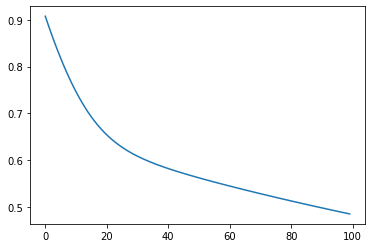

In [ ]:
# show figures
plt.plot(losses)
plt.show()

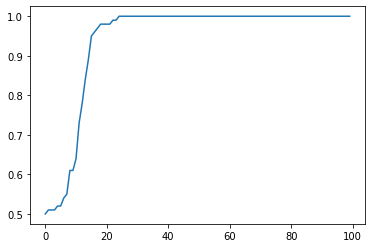

In [ ]:
plt.plot(accs)
plt.show()